In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import math

# Linear Discriminant for $p = 1$, Examples

In [9]:
df = pd.DataFrame(columns=["X" , "Y" , "Class"])

K = 2

means = [0 , 0.5]
std = 0.1
pi = []

for k in range(K):
    N = 100
    pi.append(1 / K)
    X = np.random.normal(loc = means[k] , scale = std , size = N)
    for i in range(N):
        df.loc[len(df)] = [X[i] , 0 , k]

df

,X,Y,Class
0,0.012141,0.0,0.0
1,0.006206,0.0,0.0
2,0.098708,0.0,0.0
3,-0.069923,0.0,0.0
4,-0.197362,0.0,0.0
...,...,...,...
195,0.463175,0.0,1.0
196,0.725400,0.0,1.0
197,0.350818,0.0,1.0
198,0.445348,0.0,1.0


<Axes: xlabel='X', ylabel='Count'>

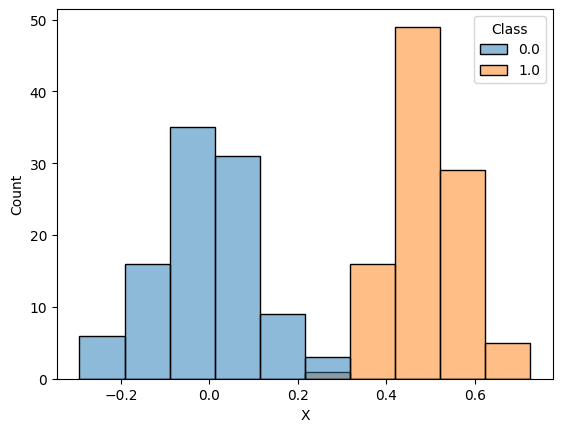

In [10]:
sns.histplot(data = df , x='X' , hue = "Class" , bins=10)

<Axes: xlabel='X', ylabel='Y'>

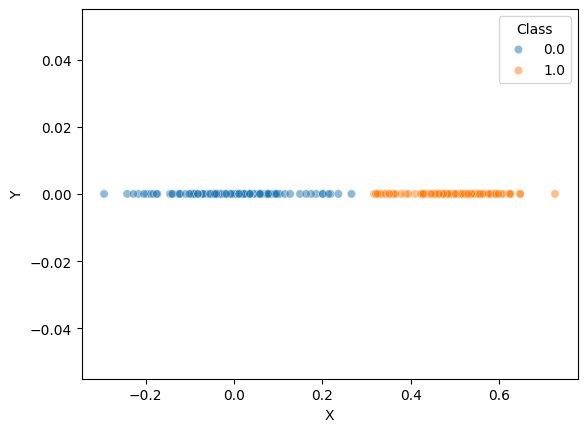

In [11]:
sns.scatterplot(data=df , x ='X' , y = 'Y' , hue = 'Class' , alpha = 0.5)

- 2 Classes are generated with the same standard deviation but different mean.

In [12]:
PI = math.pi
sigma = std

def f(k , x): # The LDA equation for p = 1
    return (1 / math.sqrt(2 * PI * sigma * sigma)) * math.exp(-(1/(2 * sigma * sigma)) * (x - means[k]) ** 2)

- With the $f_k(x)$ function above, we can calculate the probability that $x$ falls into class $k$.

In [13]:
x = 0

total = 0
for k in range(K):
    total += pi[k] * f(k , x)

for k in range(K):
    prob = pi[k] * f(k , x)
    prob /= total
    print("Probability that x would fall in class " , k , " = " , prob * 100 , "%" , sep="")

Probability that x would fall in class 0 = 99.99962733607158%
Probability that x would fall in class 1 = 0.0003726639284186568%


- For the result above, it's too obvious that $x = 0$ will falls into the first class.
- Lets make another example but less obvious.

In [14]:
x = 0.27

total = 0
for k in range(K):
    total += pi[k] * f(k , x)

for k in range(K):
    prob = pi[k] * f(k , x)
    prob /= total
    print("Probability that x would fall in class " , k , " = " , prob * 100 , "%" , sep="")

Probability that x would fall in class 0 = 26.894142136999495%
Probability that x would fall in class 1 = 73.1058578630005%


- Here, we see that the point $x = 0.27$ is somewhere in the middle of 2 classes. The LDA model predicts that $x$ fits best for the second class as the probability ~ 73.1%.
- Instead of calculating the whole equation, Let's only calculate the dicriminant function of LDA.

In [25]:
EPS = 0.00001

def discriminant(x):
    result_class = -1
    result_evaluation = 0
    for k in range(K):
        evaluation = 0

        evaluation += x * means[k] / sigma ** 2
        evaluation -= means[k] ** 2 / (2 * sigma ** 2)
        evaluation += math.log(pi[k])

        if result_class == -1 or evaluation > result_evaluation:
            result_evaluation = evaluation
            result_class = k

        print(f"Class {k} has the evaluation of {evaluation}")

    print(f"Best class fits for x = {x} is class {result_class} with the maximum evaluation of {result_evaluation} amongst all")

x = 0
discriminant(x)

Class 0 has the evaluation of -0.6931471805599453
Class 1 has the evaluation of -13.193147180559944
Best class fits for x = 0 is class 0 with the maximum evaluation of -0.6931471805599453 amongst all
